<a href="https://colab.research.google.com/github/Chinemelu4/Covid19-Analysis-Project/blob/main/Covid19_data_science_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid 19 Data Science Project

## Ingest

*COVID-19 Data from [New York Times Github](https://github.com/nytimes/covid-19-data)*

In [5]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


Last five rows

In [2]:
df.tail()

,date,state,fips,cases,deaths
61937,2023-03-23,Virginia,51,2298300,23782
61938,2023-03-23,Washington,53,1940704,15905
61939,2023-03-23,West Virginia,54,645710,8132
61940,2023-03-23,Wisconsin,55,2014524,16485
61941,2023-03-23,Wyoming,56,185800,2014


*What are the columns?*

In [3]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

*What is the shape:  i.e. rows,columns?*

In [4]:
df.shape

(61942, 5)

## EDA

*What are general characteristics of the data?  A good way to find out is `df.describe`*

In [ ]:
df.describe()

,fips,cases,deaths
count,1939.000000,1939.000000,1939.000000
mean,30.892728,1467.224342,34.104177
std,18.062123,7403.847224,210.798255
min,1.000000,1.000000,0.000000
25%,17.000000,7.000000,0.000000
50%,30.000000,75.000000,1.000000
75%,46.000000,565.000000,10.000000
max,78.000000,130703.000000,4758.000000


*Cases and Deaths in the USA due to Covid-19*

<Axes: xlabel='cases', ylabel='deaths'>

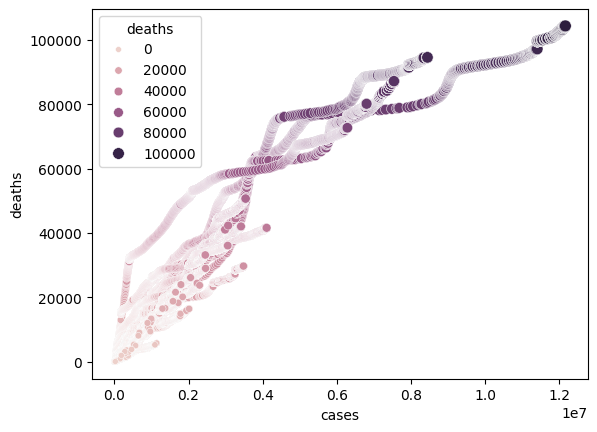

In [6]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths",
                hue="deaths",size="deaths", data=df)

### Date-based EDA

*Dealing with dates by setting index*

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
print(f"Columns: {df.columns}")
df.index

Columns: Index(['state', 'fips', 'cases', 'deaths'], dtype='object')


DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-24', '2020-01-25', '2020-01-25', '2020-01-25',
               '2020-01-26', '2020-01-26',
               ...
               '2023-03-23', '2023-03-23', '2023-03-23', '2023-03-23',
               '2023-03-23', '2023-03-23', '2023-03-23', '2023-03-23',
               '2023-03-23', '2023-03-23'],
              dtype='datetime64[ns]', name='date', length=61942, freq=None)

*Filter results by date range*

In [12]:
from datetime import date, timedelta
today = date.today()
daybefore = today - timedelta(days = 700)
print(f"Today {today}")
print(f"seven hundred days ago {daybefore}")

Today 2024-02-07
seven hundred days ago 2022-03-09


In [13]:
df.loc[daybefore:today].head()

,state,fips,cases,deaths
date,,,,
2022-03-09,Alabama,1,1287822,18694
2022-03-09,Alaska,2,241191,1165
2022-03-09,American Samoa,60,343,0
2022-03-09,Arizona,4,1987318,28097
2022-03-09,Arkansas,5,824469,10799


*The distribution of the data by date*

<Axes: xlabel='deaths', ylabel='Density'>

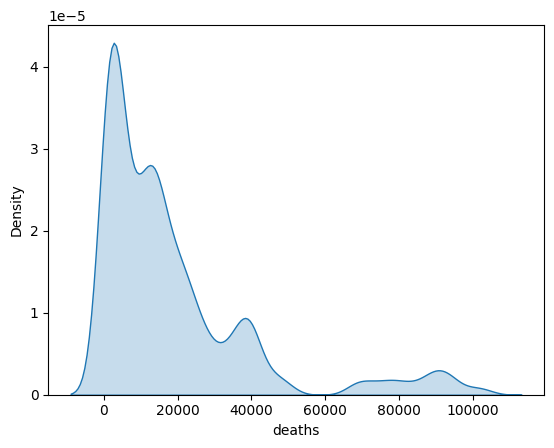

In [14]:
sns.kdeplot(df.loc[daybefore:today]["deaths"], fill=True)

<Axes: xlabel='deaths', ylabel='Density'>

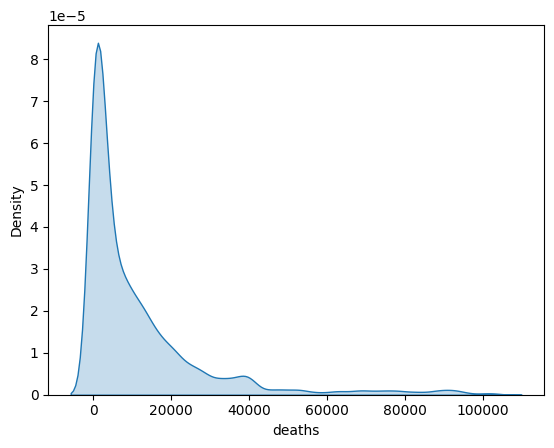

In [15]:
sns.kdeplot(df["deaths"], fill=True)

*Sort DataFrame in place by states with highest deaths and cases and show first 10 results*

In [16]:
current_df = df.loc[daybefore:today].sort_values(by=["deaths", "cases"], ascending=False)
current_df.head(10)

,state,fips,cases,deaths
date,,,,
2023-03-23,California,6,12169158,104277
2023-03-22,California,6,12155467,104196
2023-03-21,California,6,12154941,104185
2023-03-20,California,6,12154293,104165
2023-03-19,California,6,12153083,104130
2023-03-17,California,6,12153079,104130
2023-03-18,California,6,12153079,104130
2023-03-16,California,6,12152129,104114
2023-03-15,California,6,12136243,104047


*There should be 50 states and District of Columbia*

In [21]:
current_df['state'].nunique()

56

In [22]:
current_df['state'].unique()

array(['California', 'Texas', 'Florida', 'New York', 'Pennsylvania',
       'Michigan', 'Ohio', 'Illinois', 'Georgia', 'New Jersey', 'Arizona',
       'North Carolina', 'Tennessee', 'Indiana', 'Massachusetts',
       'Missouri', 'Virginia', 'Alabama', 'South Carolina', 'Louisiana',
       'Kentucky', 'Maryland', 'Oklahoma', 'Wisconsin', 'Washington',
       'Minnesota', 'Colorado', 'Mississippi', 'Arkansas', 'Connecticut',
       'Nevada', 'Iowa', 'Kansas', 'Oregon', 'New Mexico',
       'West Virginia', 'Puerto Rico', 'Idaho', 'Utah', 'Nebraska',
       'Rhode Island', 'Montana', 'Delaware', 'South Dakota',
       'New Hampshire', 'Maine', 'North Dakota', 'Wyoming', 'Hawaii',
       'District of Columbia', 'Alaska', 'Vermont', 'Guam',
       'Virgin Islands', 'Northern Mariana Islands', 'American Samoa'],
      dtype=object)

In [17]:
current_df.shape

(21280, 4)

### State Based Analysis

*Get 10 states and subset*

In [29]:
cases_by_state = current_df.groupby('state')['cases'].sum().to_frame().reset_index().sort_values(by='cases',ascending=False)
cases_by_state.head(10).reset_index(drop=True)

,state,cases
0,California,4109103207
1,Texas,2882650352
2,Florida,2591664814
3,New York,2268613139
4,Illinois,1385046560
5,Pennsylvania,1206470803
6,North Carolina,1168794131
7,Ohio,1158284469
8,Michigan,1046943803
9,Georgia,1035319242


In [30]:
top_ten_states = cases_by_state.head(10).reset_index(drop=True)['state']
top_ten_states

0        California
1             Texas
2           Florida
3          New York
4          Illinois
5      Pennsylvania
6    North Carolina
7              Ohio
8          Michigan
9           Georgia
Name: state, dtype: object

In [31]:
top_states_df = df[df['state'].isin(top_ten_states)].drop(columns="fips")

In [32]:
top_states_df

,state,cases,deaths
date,,,
2020-01-24,Illinois,1,0
2020-01-25,California,1,0
2020-01-25,Illinois,1,0
2020-01-26,California,2,0
2020-01-26,Illinois,1,0
...,...,...,...
2023-03-23,New York,6805271,80109
2023-03-23,North Carolina,3481732,29746
2023-03-23,Ohio,3415254,42061


*Verify the unique states left is the same 10*

In [33]:
set(top_states_df.state.values)

{'California',
 'Florida',
 'Georgia',
 'Illinois',
 'Michigan',
 'New York',
 'North Carolina',
 'Ohio',
 'Pennsylvania',
 'Texas'}

<Figure size 1500x500 with 0 Axes>

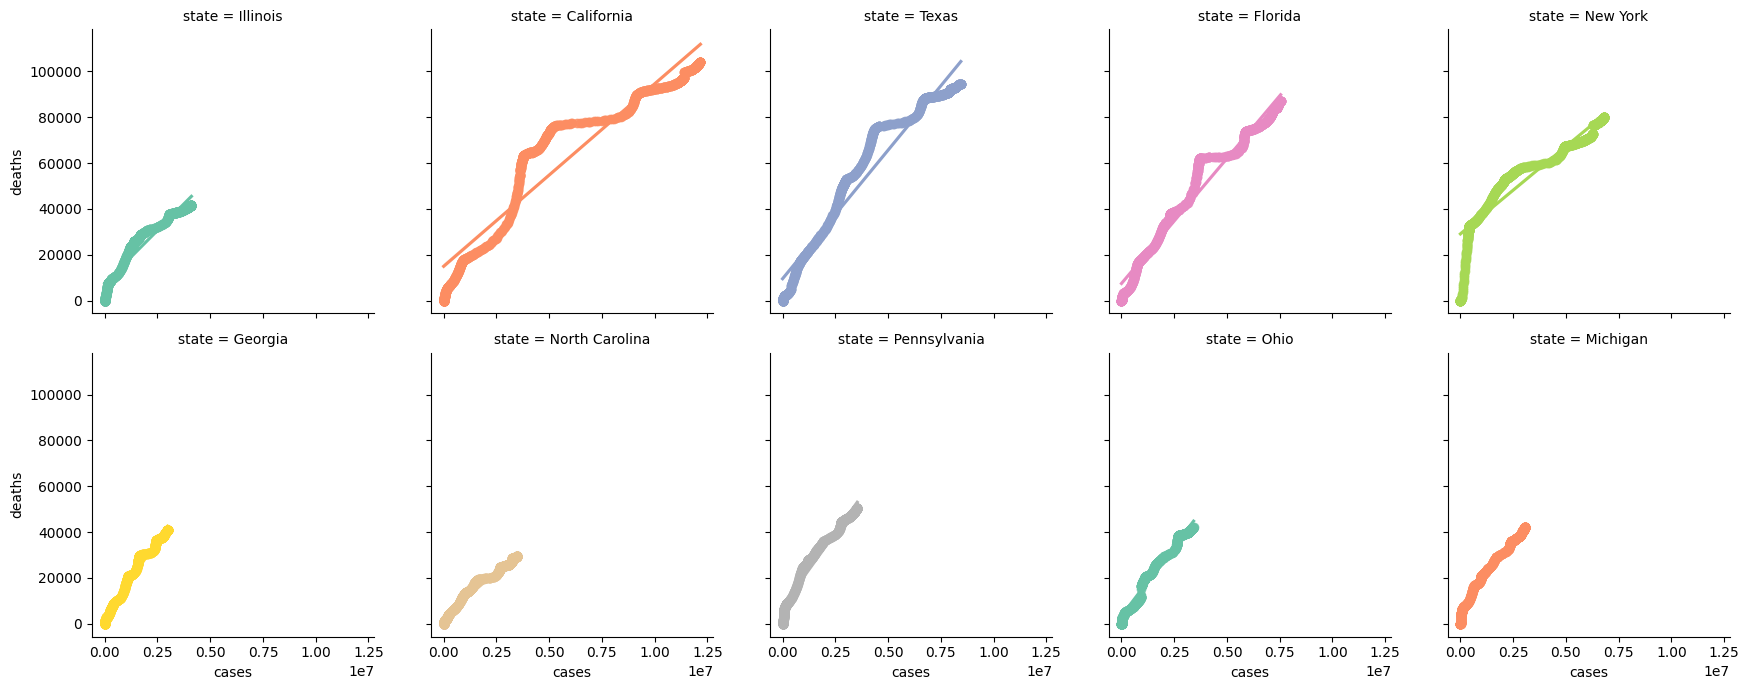

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="state",
                    col_wrap=5,
                    hue="state",
                    palette="Set2",
                    data=top_states_df)
ax.fig.subplots_adjust(wspace=.2)

*Interactive plot of top states*

In [35]:
top_states_march_2023 = top_states_df.loc["2020-03-08":today].sort_values(by=["deaths", "cases"], ascending=True)
top_states_march_2023.head()

,state,cases,deaths
date,,,
2020-03-08,North Carolina,2,0
2020-03-10,Michigan,2,0
2020-03-11,Michigan,2,0
2020-03-09,Ohio,3,0
2020-03-10,Ohio,3,0


In [37]:
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.express as px
fig = px.scatter(top_states_march_2023, x=top_states_march_2023.index, y="cases", size="deaths", color="state", facet_col="state")
fig.show()

### Search for Features:  Political, Health and Finance

*Sugar Intake By State*

In [38]:
cdc_2013 = pd.read_csv("https://raw.githubusercontent.com/noahgift/sugar/master/data/education_sugar_cdc_2003.csv")
cdc_2013.set_index("State", inplace=True)
for column in cdc_2013.columns:
  cdc_2013[column]=cdc_2013[column].str.replace(r"\(.*\)","")
  cdc_2013[column]=pd.to_numeric(cdc_2013[column])

cdc_2013.reset_index(inplace=True)
cdc_2013.rename(columns={"State": "state", "Employed": "employed-sugar-intake-daily"},inplace=True)
cdc_2013.head()

<ipython-input-38-5828ac7121d4>:4: FutureWarning:

The default value of regex will change from True to False in a future version.



,state,employed-sugar-intake-daily,Not employed,Retired,<High school,High school,Some college,College graduate
0,Alaska,26.2,32.1,16.0,47.1,34.9,24.2,12.9
1,Arizona,33.0,28.7,13.8,40.4,36.5,24.4,14.6
2,California,22.9,30.2,15.0,38.5,29.9,21.4,11.5
3,Connecticut,18.9,24.3,15.0,27.8,26.9,19.9,10.2
4,District of Columbia,18.5,34.6,18.5,45.6,39.0,28.9,8.4


*Combine Sugar Data and Covid-19 Data*

In [39]:
cdc_employed_df = cdc_2013[["employed-sugar-intake-daily", "state"]]
sugar_covid_df = df.merge(cdc_employed_df, how="inner", on="state")
sugar_covid_df.head()

,state,fips,cases,deaths,employed-sugar-intake-daily
0,California,6,1,0,22.9
1,California,6,2,0,22.9
2,California,6,2,0,22.9
3,California,6,2,0,22.9
4,California,6,2,0,22.9


*What about data from the 2016 Election?*

In [40]:
election_df = pd.read_csv("https://raw.githubusercontent.com/paiml/minimal-python/master/data/2016-Electoral-Votes.csv")
election_df.rename(columns={"State": "state"},inplace=True)
election_df.drop(columns="Votes", inplace=True)
election_df = pd.concat([election_df, pd.get_dummies(election_df["Winning Party"])], axis=1);
election_df.head()
#election_df["Republican?"] = pd.get_dummies(election_df, columns=["Winning Party"])
#election_df.head()

,state,Winning Party,Democrats,Republicans
0,Alabama,Republicans,0,1
1,Alaska,Republicans,0,1
2,Arizona,Republicans,0,1
3,Arkansas,Republicans,0,1
4,California,Democrats,1,0


In [41]:
sugar_covid_df = sugar_covid_df.merge(election_df, how="inner", on="state")
sugar_covid_df.head()

,state,fips,cases,deaths,employed-sugar-intake-daily,Winning Party,Democrats,Republicans
0,California,6,1,0,22.9,Democrats,1,0
1,California,6,2,0,22.9,Democrats,1,0
2,California,6,2,0,22.9,Democrats,1,0
3,California,6,2,0,22.9,Democrats,1,0
4,California,6,2,0,22.9,Democrats,1,0


*Generate Heatmap*

In [42]:
sugar_covid_df.corr()

<ipython-input-42-b9664867f6da>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,fips,cases,deaths,employed-sugar-intake-daily,Democrats,Republicans
fips,1.000000,-0.120943,-0.127549,0.269999,-0.187330,0.187330
cases,-0.120943,1.000000,0.935557,-0.124204,0.221498,-0.221498
deaths,-0.127549,0.935557,1.000000,-0.161596,0.299948,-0.299948
employed-sugar-intake-daily,0.269999,-0.124204,-0.161596,1.000000,-0.767539,0.767539
Democrats,-0.187330,0.221498,0.299948,-0.767539,1.000000,-1.000000
Republicans,0.187330,-0.221498,-0.299948,0.767539,-1.000000,1.000000


In [47]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                   z=sugar_covid_df.corr(),
                   x=['fips','cases', 'deaths', 'employed-sugar-intake-daily', 'Democrats', 'Republicans'],
                   y=['fips','cases', 'deaths', 'employed-sugar-intake-daily', 'Democrats', 'Republicans'],
                   hoverongaps = False,colorscale='blugrn'))
fig.show()

<ipython-input-47-75727ba9754b>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<ipython-input-56-cdc65763e25a>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



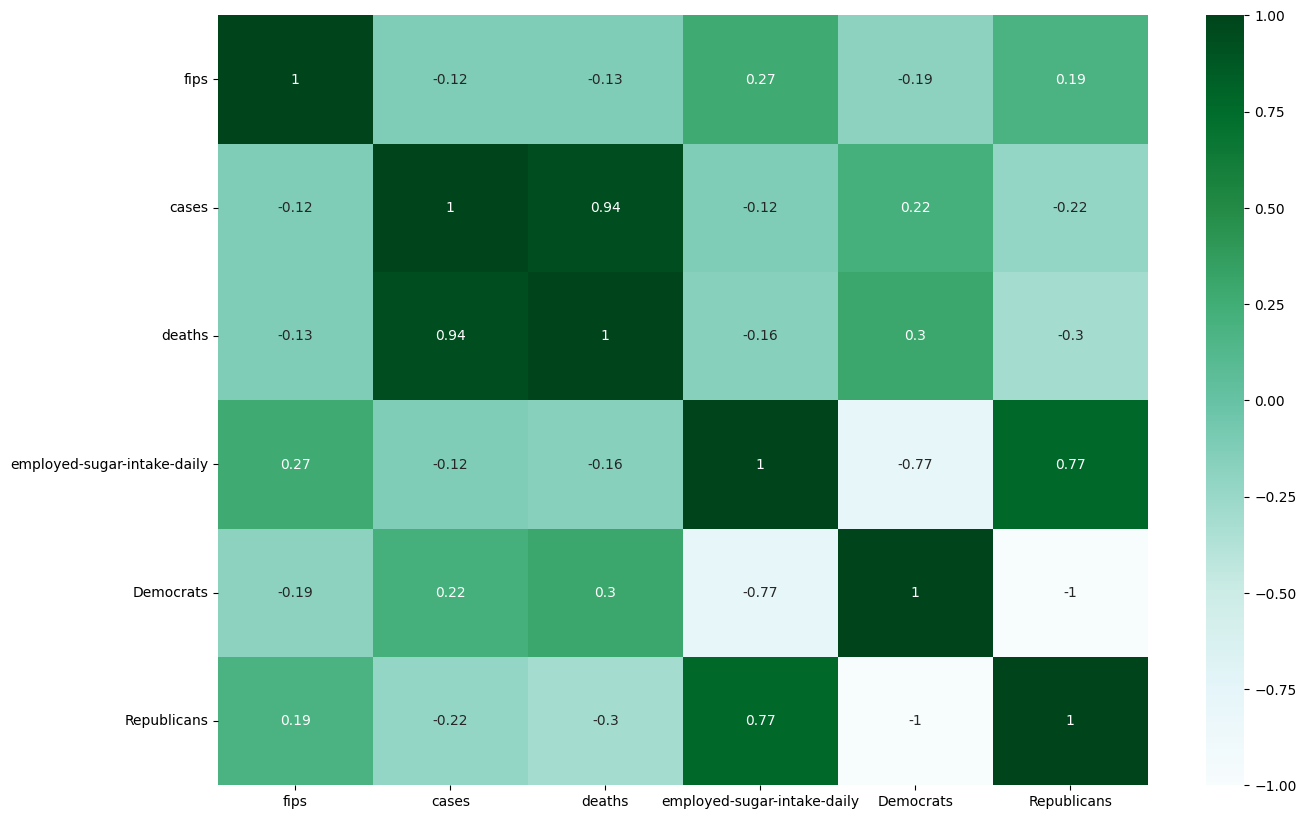

In [56]:
plt.figure(figsize=(15,10))
sns.heatmap(sugar_covid_df.corr(),annot=True,cmap='BuGn')
plt.show()

*What about Real-Estate Data?*

## Modeling

## Conclusion
